## GRIP: The Sparks foundation


### ( Data Science and Business Analytics Intern)


### Author: Gargi Mishra


### ~ Task 1:prediction Using Supervised ML


#### QUES 1. What will be predicted score if a student studies for 9.25 hrs/ day?


 In this we have to predict the percentage score of a student based on the number of hours studied.The task has two variable where the feature is the number of hours studied and the target value is the percentage score. This can be solved using simplelinear regression .This problem can be solved in following steps:-

### STEP 1 - Importing the Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns


In [7]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
#To find the number of columns and rows
df.shape

(25, 2)

In [11]:
#To find the more information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
#now we will check if our dataset contains null or missing values
df.isnull().sum()


Hours     0
Scores    0
dtype: int64

###### as we can see we do not have any null values in our datset so we can now move on to our next step

## STEP 2 -Visualizing The Dataset

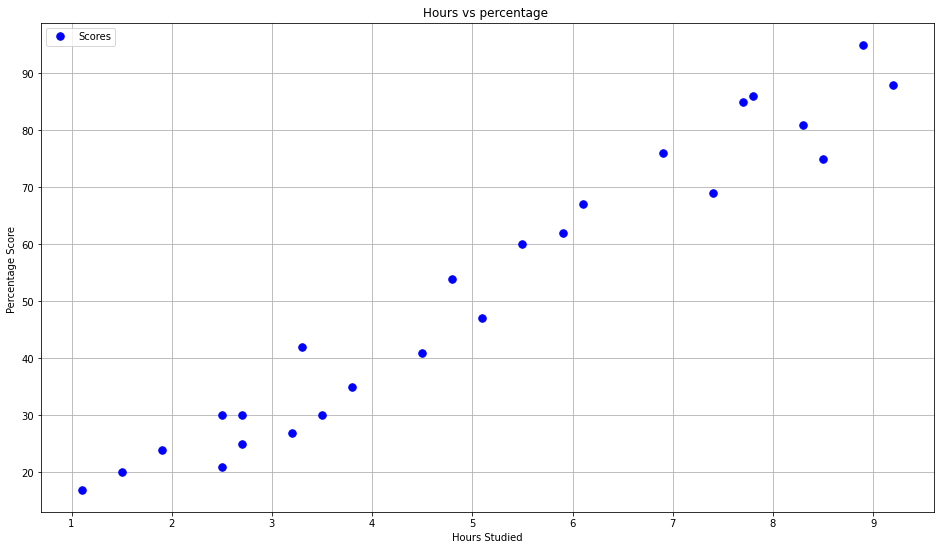

In [14]:
#plotting the dataset 
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours',y='Scores',style='.',color='blue',markersize=15)
plt.title('Hours vs percentage ')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score ')
plt.grid()
plt.show()

###### From the above graph ,we can observe that there is linear relationship between 'hour studied 'and 'percentage score '.So ,we can use the linear regression supervised  machine model on it to predict the further values.

In [15]:
#we can also use .corr to detrmine the corelation between the variable 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## STEP 3 -Data Preparation 

###### In this step we will devide the data into 'features '(inputs)and 'labels'(outputs).After that we will split the whole dataset into 2 parts -testing data and training data

In [16]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
#using iloc function we will devide the data
X = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

In [28]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [31]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [33]:
#Splitting data into training and testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        test_size=0.2,random_state=0)


### STEP 4 - Training The Algorithm

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### STEP 5 - Visualizing The Model

After training the model,now its time to visualize it

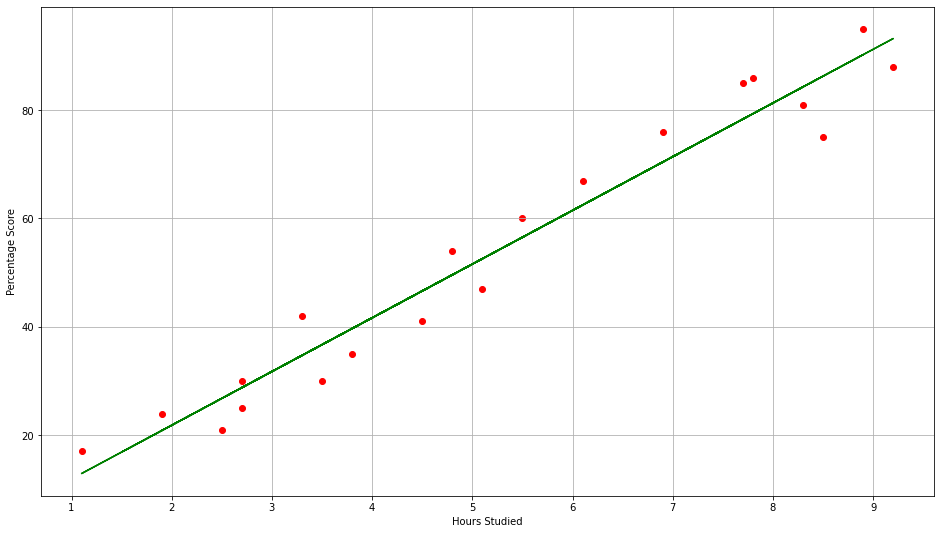

In [45]:
line=model.coef_*X + model.intercept_ 
#Plotting the dataset
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_train, y_train, color='red')
plt.plot(X,line,color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

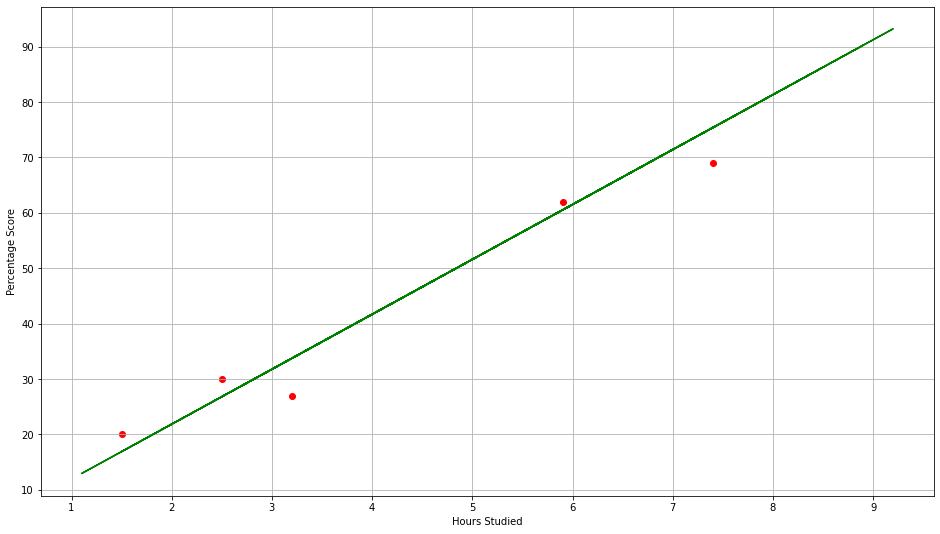

In [44]:
#plotting for the testing data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(X_test, y_test, color='red')
plt.plot(X,line,color='green');
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### STEP 6 - Making Predicton

Now that we have trained our algorithm,itstime to make some predictions

In [46]:
print(X_test) #testing data in hours
y_pred = model.predict(X_test)  #Predicting the Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
#comparing Actual vs Predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [48]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [50]:
#comparing Actual vs Predicted
comp = pd.DataFrame ({'Actual ':[y_test],'Predicted ':[y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [52]:
# Testing with your own data 

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studied for ",hours,"hours is",own_pred[0])

The predicted score if a person studied for  9.25 hours is [93.69173249]


#### Hence ,from the above result it can be concluded that the predicted score if a person studied for 9.25 hours is 93.691732487 

### STEP 7 - Evaluating the model


This is the last  step where we are going to evaluate our trained model by calculating mean absolute error

In [56]:
from sklearn import metrics
print('Mean absolute Error :', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute Error : 4.183859899002982
